# Ejercicio 1: OR

In [241]:
import numpy as np
import matplotlib.pyplot as plt

In [242]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

In [243]:
# rand(len(ds['x1'])) - 0.5
# print(w.min(), w.max())

w = np.random.rand(3) - 0.5
N = 20 # Epocas
gamma = 0.001 # Tasa de aprendizaje
nu = 0.05 # Umbral de error

for i in range(N):
    for j in ds_train:
        # Convolución
        y = j[0] * w[1] + j[1] * w[2] - w[0]
        # print('y_c', y)
        # No linealidad
        if (y > 0):
            y = 1
        else:
            y = -1
        # Actualización de pesos
        # print('x1', j[0], 'x2', j[1], 'y', y)
        w = w + np.concatenate([[-1], j[0:2]]) * gamma * (j[2] - y)
    
    errores = 0
    for j in ds_train[np.random.randint(0, 2000, size=200)]:
        # Convolución
        y = j[0] * w[1] + j[1] * w[2] - w[0]
        # No linealidad
        if (y > 0 and 1 != j[2]):
            errores += 1
        elif (y <= 0 and -1 != j[2]):
            errores += 1
    error = (errores/200)
    print(f'Epoca {i}: error = {error}')
    if (error < nu):
        break

print(w/ np.linalg.norm(w))

Epoca 0: error = 0.0
[-0.05499604  0.71003677  0.70201369]


In [244]:
errores = 0

for j in ds_test:
    # Convolución
    y = j[0] * w[1] + j[1] * w[2] - w[0]
    # No linealidad
    if (y > 0 and 1 != j[2]):
        errores += 1
    elif (y <= 0 and -1 != j[2]):
        errores += 1

print('error:', (errores/200)*100, '%')

error: 0.0 %


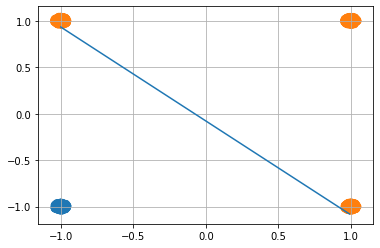

In [245]:
fig1 = plt.figure() 
x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
plt.grid()
plt.scatter(x_x, x_y, c = x_color)

x_recta = np.arange(-1, 1, 0.01)
recta = w[0]/w[2] - w[1]/w[2] * x_recta
plt.plot(x_recta, recta)

# Ejercicio 1: XOR

In [246]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Ejercicio 2

In [247]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test))
    M_train = np.zeros((n, n_train))

    for i in range(n):
        idx = np.arange(ds.shape[0])
        np.random.shuffle(idx)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return M_test, M_train

M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', 2, 0.2)
print(M_tst)
    

[[431. 771. 140. 185. 439. 866. 246.  79. 977. 959. 941. 166.  87. 917.
  433. 162.  28. 506. 913. 145. 601. 350. 142. 261. 793. 761. 444. 220.
  290. 929. 817. 251. 575. 508. 318. 587. 906. 339. 451. 680.  12. 723.
  811. 357. 106. 311. 155. 549.  81. 851. 976. 301. 774. 669. 179. 481.
  227. 564. 138. 363.  23. 507. 591. 726. 660. 207. 293. 314. 340. 150.
  105. 815. 748. 794.  50. 933. 936. 704.  62. 852. 182. 266. 666. 925.
   49. 765. 943.  36. 611. 964. 218. 522. 319. 337. 445. 374. 674. 760.
  805. 653. 216. 315. 402.   1. 736. 174. 173. 664. 277.  45. 899. 585.
  273. 887. 348. 438. 397.   3. 845. 217. 292. 691. 287. 157. 578. 198.
  973. 407. 244.  18. 520. 354. 275. 528. 313. 641. 159. 928. 111. 746.
  455. 635. 415.  78. 759. 518. 547. 493. 165. 112. 404. 931.   4. 269.
  428. 525.  64. 912. 205. 695. 295. 303. 918.  94. 661. 248. 682. 178.
  183. 745. 231. 308. 171. 969. 286. 427. 801. 622. 543.  60.   2. 965.
  934. 889. 289. 619. 146. 267. 332. 224. 517. 503. 502. 334. 63